# Imports

In [1]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

# Conditional gradient methods

### Implementation

In [41]:
def project_to_birkhoff_frank_wolfe(Y, max_iter=1000, tol=1e-6):
    """
    Projects matrix Y onto the Birkhoff polytope using the Frank-Wolfe algorithm.

    Args:
        Y (np.ndarray): The matrix to project.
        max_iter (int): Maximum number of iterations.
        tol (float): Tolerance for convergence (change in objective value).

    Returns:
        np.ndarray: The projection of Y onto the Birkhoff polytope.
        list: History of objective function values.
    """
    n = Y.shape[0]
    assert Y.shape[0] == Y.shape[1], "Input matrix must be square"

    # Initialize with a feasible point (e.g., uniform matrix)
    Xk = np.ones((n, n)) / n

    objective_history = []

    for k in range(max_iter):
        # Objective function value
        obj_val = 0.5 * np.linalg.norm(Xk - Y, 'fro')**2
        objective_history.append(obj_val)

        diff = -1
        if k > 0:
            diff = abs(objective_history[-1] - objective_history[-2])

        if diff > 0 and diff < tol:
            print(f"Converged after {k} iterations.")
            break

        # 1. Compute gradient
        grad_fk = Xk - Y

        # 2. Solve the LMO: S_k = argmin_{S in Birkhoff} <grad_fk, S>
        # Use linear_sum_assignment on the cost matrix grad_fk
        row_ind, col_ind = linear_sum_assignment(Xk - Y, False)

        Sk = np.zeros((n, n))
        # Construct permutation matrix Sk based on row_ind, col_ind
        Sk[row_ind, col_ind] = 1

        # 3. Compute step size gamma_k
        # Optimal step size for projection, clipped to [0, 1]
        delta_k = Xk - Sk
        denom = np.linalg.norm(delta_k, 'fro')**2
        if denom < 1e-12: # Avoid division by zero if Xk is already the vertex Sk
            gamma_k = 0.0
        else:
            numerator = np.sum((Xk - Y) * (Xk - Sk))  # Frobenius inner product
            denominator = np.linalg.norm(Xk - Sk, 'fro')**2  # Squared Frobenius norm
            gamma_k = numerator / denominator
            gamma_k = np.clip(gamma_k, 0.0, 1.0)

        # 4. Update
        Xk = (1 - gamma_k) * Xk + gamma_k * Sk # YOUR CODE HERE 

    else: # If loop finishes without breaking
         print(f"Reached max iterations ({max_iter}).")

    return Xk, objective_history

### Testing

Reached max iterations (200).


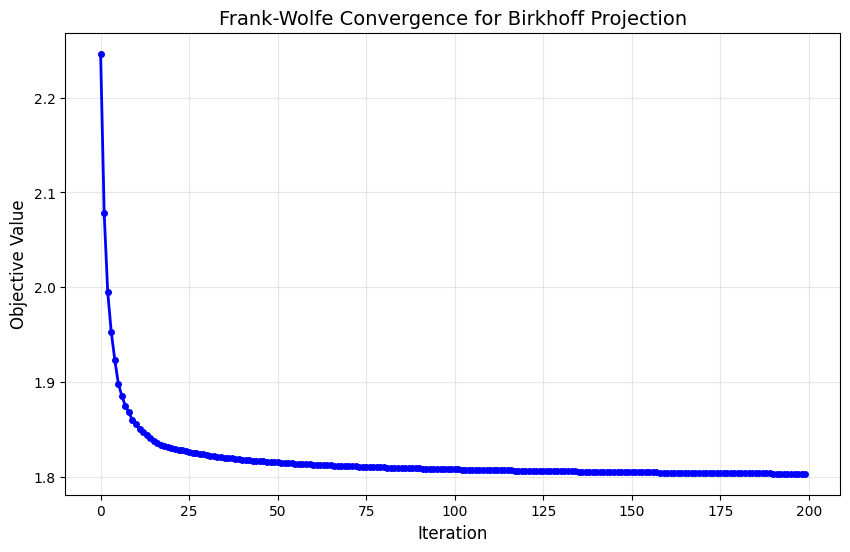

In [44]:
# Generate Y matrix
Y = np.random.rand(5, 5)

# Get algorithm results
X, objective_history = project_to_birkhoff_frank_wolfe(Y, max_iter=200)

# Plot history
plt.figure(figsize=(10, 6))
plt.plot(objective_history, 'b-o', linewidth=2, markersize=4)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Objective Value', fontsize=12)
plt.title('Frank-Wolfe Convergence for Birkhoff Projection', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

### Result veryfication

In [53]:
n = X.shape[0]

print(X)

for i in range(n):
  print(f'row {i} sum: {round(np.sum(X[i]), 2)} column {i} sum: {round(np.sum(X.T[i]), 2)}')

[[0.29691085 0.00856186 0.38962069 0.29634474 0.00856186]
 [0.00856186 0.16325243 0.16807486 0.12911151 0.53099934]
 [0.30549834 0.47059397 0.00856186 0.20678398 0.00856186]
 [0.26338695 0.27900795 0.34270118 0.00856186 0.10634207]
 [0.125642   0.0785838  0.09104141 0.35919791 0.34553488]]
row 0 sum: 1.0 column 0 sum: 1.0
row 1 sum: 1.0 column 1 sum: 1.0
row 2 sum: 1.0 column 2 sum: 1.0
row 3 sum: 1.0 column 3 sum: 1.0
row 4 sum: 1.0 column 4 sum: 1.0


Result: $X \in B_5$

# Subgradient method